# **Project Name** - Airbnb Booking Analysis
**Project Type -** EDA

**Contribution -** Individual

# **Project Summary**

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.



# **Problem Statement**

1.	which kind of room is more common in the New York City Airbnb.
2.	average prices for each of these room types ?
3.  average minimum nights for each room type ?
4.  What is the average minimum nights for each room type?
5.  How do boroughs differ?
6.  Who are the most successful hosts?
7.  what is the Price Distribution in every neighbourhood group ?
8.  What is the realtionship between price and another numeric feature  
9.  Which is the most expensive city ?
10. how many rooms are available in each region ?



# Import Data

We'll begin by importing:

pandas for data manipulation;

numpy for numeric operations;

seaborn and matplotlib for data visualization;

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# For  loading data from Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# working_dir_path = '/content/drive/MyDrive/dat'
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Airbnb_NYC_2019.csv.csv')

# Dataset First View


In [ ]:
# Peeking into the Data
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Dataset Rows & Columns count


In [ ]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print('number of rows equals to {} '.format(num_rows))
print('number of columns equals to {}'.format(num_cols))

number of rows equals to 48895 
number of columns equals to 16


**Observations**

1)The total number of rows and columns is 48895 and 16 respectively.

2)Some columns have null values and missing data,we will need to clean those.

# Dataset Information

In [ ]:
# Obtaining important info
df.info(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Duplicate Values

In [ ]:
print(len(df[df.duplicated()]))

0


# Missing Values/Null Values

In [ ]:
(df.isnull()).sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Observations**

1)Columns like name,host_name,last_review,reviews_per_month have missing values. name and host_name column is not important as it does not convey any meaningful data. So those columns can be dropped.

2)last_review and reviews_per_month have the same number of Null values which means certain properties were not rated at all hence last_review has no data and reviews_per_month has no data.

In [ ]:
#set of columns that have no missing values
no_nulls = set(df.columns[df.isnull().sum() == 0])
no_nulls

{'availability_365',
 'calculated_host_listings_count',
 'host_id',
 'id',
 'latitude',
 'longitude',
 'minimum_nights',
 'neighbourhood',
 'neighbourhood_group',
 'number_of_reviews',
 'price',
 'room_type'}

<Axes: >

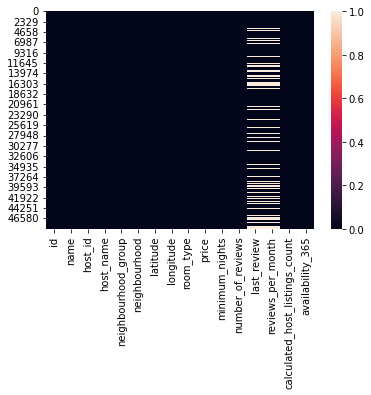

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull())

# **Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
#name column
df.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [ ]:
df[df['name'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,NaN,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0


**Observation**:

This columns is having names describing the property which host is trying to give on rent,so the nature of this names is short and consise and this is required as this can draw an attention of customer.

The question arises that how to fill the missing values in this columns.we will explore further dataset and try to find out better optiions to fill the missing values.

This Feature can be important in model building like Recommender systems.
Of course there is no point in removing these cells although they are limited in numbers.

In [ ]:
df.room_type

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [ ]:
# A function for price_correction
def price_correction(x):
    if x==0:
        return 100
    else:
        return x

In [ ]:
df[df['price']==0]
#Rows which have 'price'=0

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue,total_revenue,average_revenue
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28,0,62849,15712.250000
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127,0,13795,3448.750000
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0,0,76285,15257.000000
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0,0,19345,9672.500000
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73,0,0,0.000000
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176,0,26255,4375.833333
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232,0,26255,4375.833333
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222,0,26255,4375.833333
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0,0,0,0.000000
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333,0,2992,498.666667


In [ ]:
# Using the price_correction function to change the 'price'
df['price']=df['price'].apply(price_correction)

In [ ]:
# 'price' has no value equal to zero
df[df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue,total_revenue,average_revenue


In [ ]:
#Changing values of 'minimum_nights' to 365 which are greater than 365
df['minimum_nights']=df['minimum_nights'].apply(lambda x: 365 if x>365 else x)

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenue,total_revenue,average_revenue
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,4.889500e+04,4.889500e+04,4.889500e+04
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.743184,6.942980,23.274466,1.373221,7.143982,112.781327,3.593248e+04,1.580717e+05,3.593248e+04
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.144546,17.530294,44.550582,1.680442,32.952519,131.622289,6.138632e+04,7.493560e+05,5.948273e+04
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,1.277500e+04,2.007500e+04,1.380000e+04
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,2.555000e+04,3.708800e+04,2.555000e+04
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,4.562500e+04,6.935000e+04,4.562500e+04
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000,3.650000e+06,1.018718e+07,3.650000e+06


**Observations**

1. Min of Price variable is 10, max is 10000.

2. Mean price is 152.

3. On an average people stay 7 days in a room.

# **Data is Cleaned and all values which do not make sense are removed**

Text(0.5, 0, 'neighbourhood group')

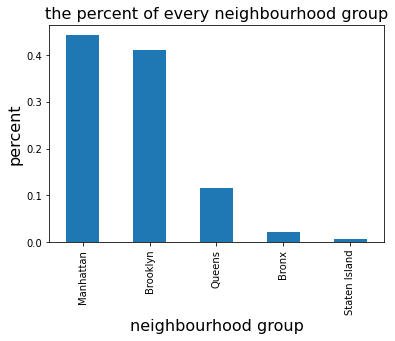

In [ ]:
#visualize the categorical values for the neighbourhood_group
plt.figure(figsize=(6,4))
count_neigh = df.neighbourhood_group.value_counts()
(count_neigh/df.shape[0]).plot(kind='bar');
plt.title('the percent of every neighbourhood group', fontsize = 16)
plt.ylabel('percent', fontsize = 16)
plt.xlabel('neighbourhood group', fontsize = 16)

**Observations**

The Majority of the listings are located in Manhattan and Brooklyn whereas Bronx and Staten Island have a miniscule share

Text(0, 0.5, 'the percent of every room type')

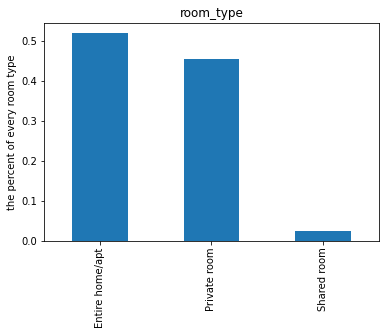

In [ ]:
#visualize the categorical values for the room_type
count_room = df.room_type.value_counts()
(count_room/df.shape[0]).plot(kind='bar');
plt.title('room_type')
plt.ylabel('the percent of every room type')

In [ ]:
# obtain a dataframe of average price across five boroughs in room_type
pd.DataFrame(df.groupby(['neighbourhood_group','room_type']).mean()['price'])

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.506596
                    Private room      66.788344
                    Shared room       59.800000
Brooklyn            Entire home/apt  178.327545
                    Private room      76.500099
                    Shared room       50.527845
Manhattan           Entire home/apt  249.239109
                    Private room     116.776622
                    Shared room       88.977083
Queens              Entire home/apt  147.050573
                    Private room      71.762456
                    Shared room       69.020202
Staten Island       Entire home/apt  173.846591
                    Private room      62.292553
                    Shared room       57.444444

In [ ]:
# obtain a dataframe of average availability_365 across five boroughs in room_type
pd.DataFrame(df.groupby(['neighbourhood_group','room_type']).mean()['availability_365'])

availability_365
neighbourhood_group room_type                        
Bronx               Entire home/apt        158.000000
                    Private room           171.331288
                    Shared room            154.216667
Brooklyn            Entire home/apt         97.205147
                    Private room            99.917983
                    Shared room            178.007264
Manhattan           Entire home/apt        117.140996
                    Private room           101.845026
                    Shared room            138.572917
Queens              Entire home/apt        132.267176
                    Private room           149.222716
                    Shared room            192.186869
Staten Island       Entire home/apt        178.073864
                    Private room           226.361702
                    Shared room             64.777778

# Variable Distribution

We'll now plot some histograms in order to see the distribution for each variable and start looking for outliers.

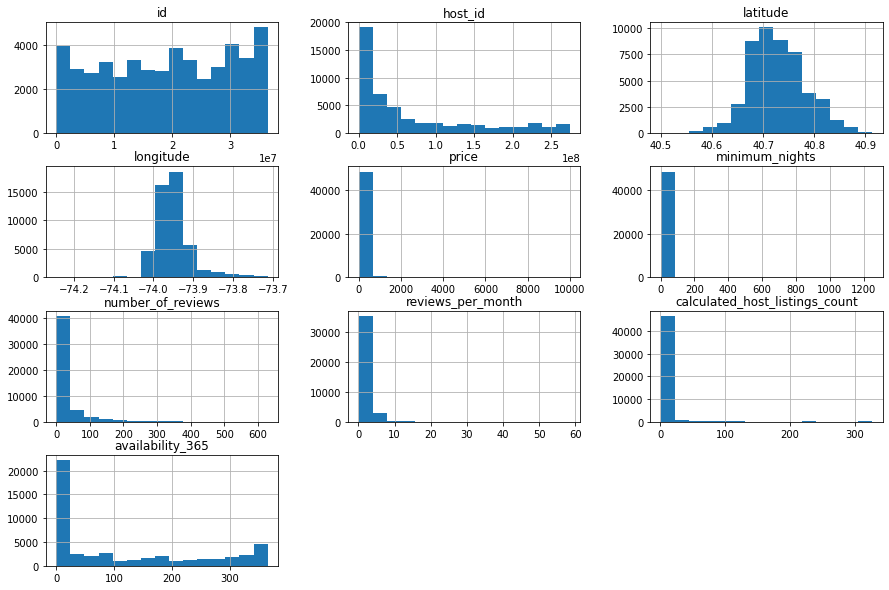

In [ ]:
df.hist(bins=15, figsize=(15,10));

**Observations**

Looking at the histograms, we can notice that some important variables like **price** and **minimum_nights** our poorly distributed. In order to better identify these problems, let's see more statistics about the dataset using the **describe** method.

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Removing Outliers
We'll plot boxplots for each of these columns so we can take a closer look at their distribution.

Also, let's see how many and what percentages of prices are equal to 0 and
500.0 and the percentages of minimum nights that are over 30 nights.

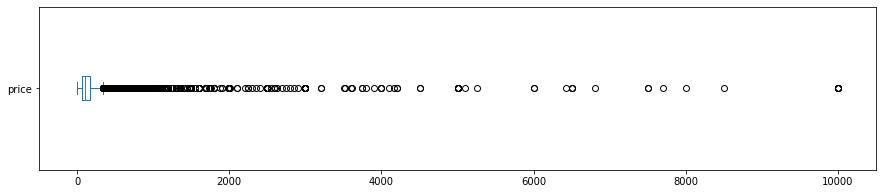

Values over $500.00: 
1044
2.1352%


Values equal to $0: 
11
0.0225%


In [ ]:
# Displaying the box plot
df['price'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of prices that are equal to 0 and
500.00
print('Values over $500.00: ')
print(len(df[df['price'] > 500]))
print('{:.4f}%'.format((len(df[df['price'] > 500]) / df.shape[0]) * 100))
print('\n')
print('Values equal to $0: ')
print(len(df[df['price'] == 0]))
print('{:.4f}%'.format((len(df[df['price'] == 0]) / df.shape[0]) * 100))

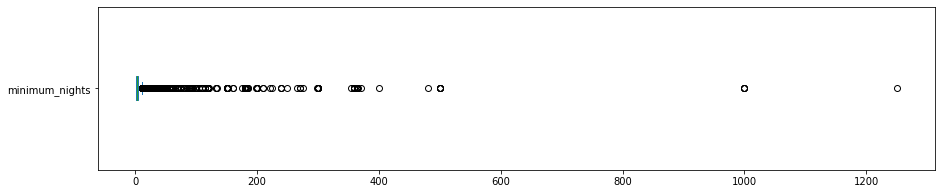

Values over 30 nights: 
747
1.5278%


In [ ]:
# Displaying the box plot
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# Calculating the number and the percentage of rooms with the minimum nights value over 30
print('Values over 30 nights: ')
print(len(df[df['minimum_nights'] > 30]))
print('{:.4f}%'.format((len(df[df['minimum_nights'] > 30]) / df.shape[0]) * 100))

**Observations**


We can see that only 2.27% of the price column is above $500.00 and only 1.54% of the values in the minimum_nights column is above 30. We have 26 elements with price zero as well.

Taking into consideration, as we said earlier, that 75% of these columns' values are below $175.00 and 5 nights, respectively, it is reasonable to lose roughly 3.8% of the data in order to make it more realistic. Therefore, we'll create a new dataframe, ny_clean, that contains only the rows in which the price is more than
500, and the minimum nights is no more than 30.

Also, probably some columns fulfill both these requirements, which means that we are losing even less than 3.8% of the dataset.

After we create the new dataframe, we'll drop the reviews_per_month and last_review columns as we said earlier in the project.

Finally, let's see if the histograms look better

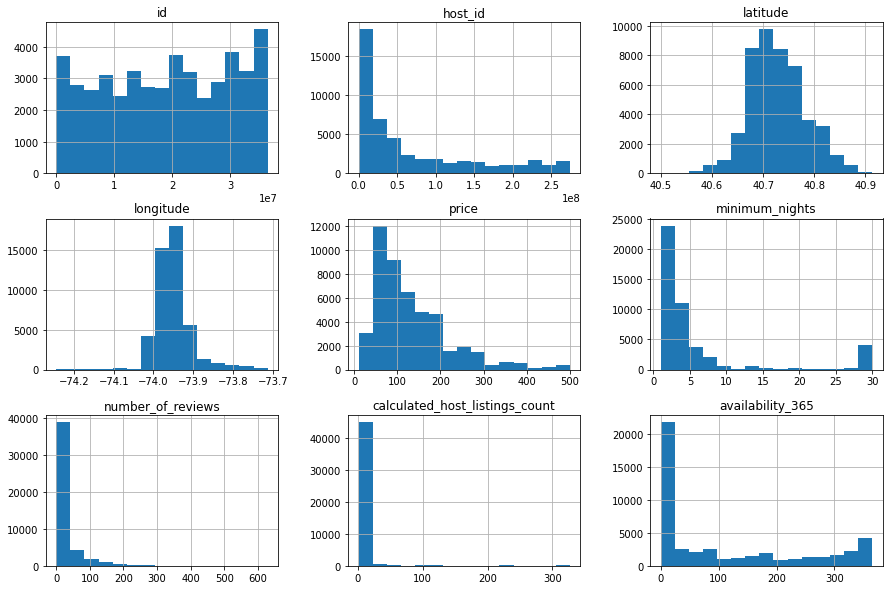

In [ ]:
# Selecting the rows that fulfil the established requirements
df_clean = df[(df['price'] <= 500) & (df['price'] > 0) & (df['minimum_nights'] <= 30)].copy()

# Droping the columns
df_clean.drop(['reviews_per_month', 'last_review'], axis=1, inplace=True)
df_clean.reset_index(drop=True, inplace=True)

# Plotting the histograms againd
df_clean.hist(bins=15, figsize=(15,10));

We can still see, for example, that the most common prices are still below U$100.00, but the distribution is much more realistic now.

# Correlations

Now let's see if there's any correlation between the numeric variables in the dataset.

We'll first create a correlation matrix using the corr method and then we will take advantage of the heat_map function from seaborn to visualize this matrix.

In [ ]:
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()
corr

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.054697,-0.048772,0.162603,0.093187
minimum_nights,0.054697,1.000000,-0.148999,0.332898,0.242084
number_of_reviews,-0.048772,-0.148999,1.000000,-0.072440,0.182621
calculated_host_listings_count,0.162603,0.332898,-0.072440,1.000000,0.229478
availability_365,0.093187,0.242084,0.182621,0.229478,1.000000


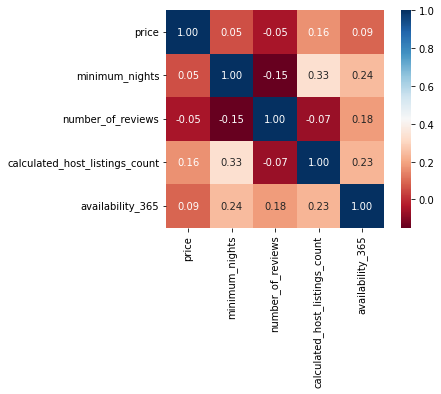

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

As we can see, the variables do not seem to be significantly correlated to one another.

# Analysis

1.	which kind of room is more common in the New York City Airbnb.

Entire home/apt    24029
Private room       21963
Shared room         1133
Name: room_type, dtype: int64


Entire home/apt    50.99
Private room       46.61
Shared room         2.40
Name: room_type, dtype: float64




/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


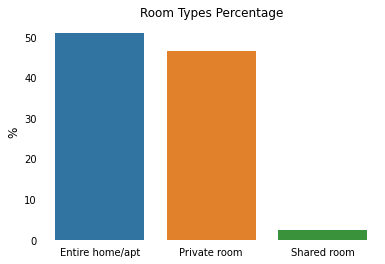

In [ ]:
# Calculating the number of rooms for each room type
room_type = df_clean['room_type'].value_counts().sort_values(ascending=False)

# Calculating the percentage of rooms for each room type
room_type_pct = round(df_clean['room_type'].value_counts(normalize=True)  * 100, 2)

# Displaying the results
print(room_type)
print('\n')
print(room_type_pct)
print('\n')

# Plotting the percentage of rooms for each room type
ax = sns.barplot(room_type_pct.index, room_type_pct)
ax.set_title('Room Types Percentage')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Entire apartments and private rooms dominate the Airbnb market in New York City. and shared rooms are very less .

2.	average prices for each of these room types. ?

room_type
Entire home/apt    180.06
Private room        81.87
Shared room         63.78
Name: price, dtype: float64




/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


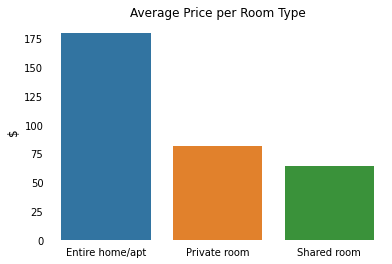

In [ ]:
# Calculating the average price per room type
type_price = round(df_clean.groupby('room_type').price.mean(), 2).sort_values(ascending=False)

# Displaying the results
print(type_price)
print('\n')

# Plottingthe average price per room type
ax = sns.barplot(type_price.index, type_price)
ax.set_title('Average Price per Room Type')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

it is reasonable to think that entire apartments are more expensive than private rooms and that private rooms are more expensive than shared rooms.

3. how many hosts are in every neighbourhood_group?

         host_id neighbourhood_group  count
34757  219517861           Manhattan    327
29495  107434423           Manhattan    230
         host_id neighbourhood_group  count
31174  137358866              Queens     79
15831   19303369              Queens     29
        host_id neighbourhood_group  count
9757    7503643            Brooklyn     52
18675  26377263            Brooklyn     35
        host_id neighbourhood_group  count
954      310670               Bronx     13
17698  23878336               Bronx     10
         host_id neighbourhood_group  count
29249  104812805       Staten Island      8
31224  137999892       Staten Island      7


Text(0.5, 0, 'the neighbourhood group')

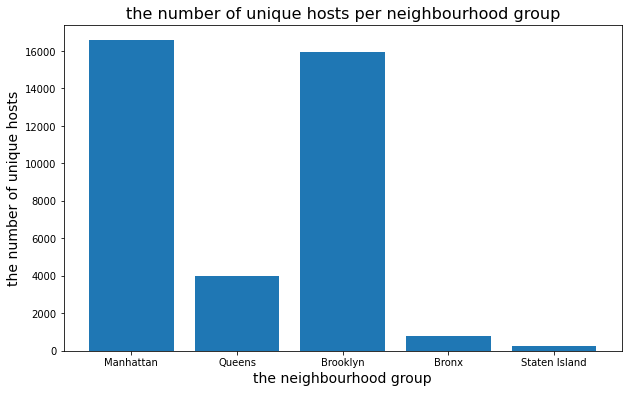

In [ ]:
df_host_area = df.groupby(['host_id', 'neighbourhood_group']).count()['id'].to_frame().reset_index()
df_host_area.sort_values('id', ascending = False, inplace =True)
df_host_area.rename(columns = {'id':'count'}, inplace = True)

#create a list of the names of the neighbourhood groups
neigh_list = df_host_area['neighbourhood_group'].unique().tolist()

#create a dictionary to hold the name od the group with the count of unique hosts
count_unique_host = {}

i = 0
for group in neigh_list:
    df_group = df_host_area[df_host_area.neighbourhood_group == group]
    count_unique_host[group] = df_group.shape[0]

    #print the first two hosts ids in every group
    print(df_group.head(2))

    #plotting the number of unique hosts per group
plt.figure(figsize=(10,6))

plt.bar(count_unique_host.keys(), count_unique_host.values())
plt.title('the number of unique hosts per neighbourhood group', fontsize =16)
plt.ylabel('the number of unique hosts', fontsize = 14)
plt.xlabel('the neighbourhood group', fontsize =14)

4. What is the average minimum nights for each room type.

room_type
Entire home/apt    6.69
Shared room        4.64
Private room       4.39
Name: minimum_nights, dtype: float64




/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


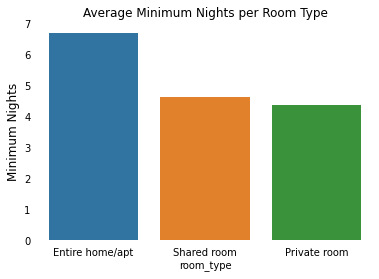

In [ ]:
# Calculating the average minimum nights per room type
room_type_nights = round(df_clean.groupby('room_type').minimum_nights.mean(), 2).sort_values(ascending=False)

# Displaying the results
print(room_type_nights)
print('\n')

# Plotting the average minimum nights per room type
ax = sns.barplot(room_type_nights.index, room_type_nights)
ax.set_title('Average Minimum Nights per Room Type')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('Minimum Nights', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)

5. How do boroughs differ?

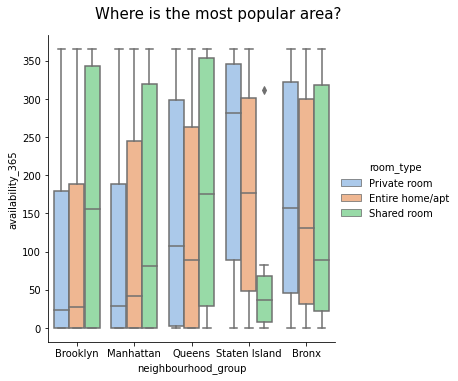

In [ ]:
# Availability according to different room_type in different areas
fig = sns.catplot(x='neighbourhood_group',y='availability_365',kind='box',hue='room_type',data=df,palette='pastel')
fig.fig.suptitle('Where is the most popular area?',fontsize=15,y=1.05)
fig.savefig('popular_area.png', bbox_inches = 'tight')

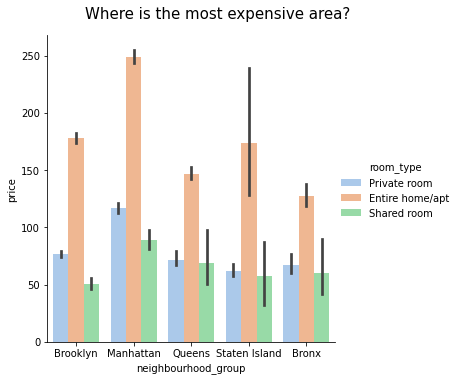

In [ ]:
# Price according to different room_type in different areas
fig2 = sns.catplot(x='neighbourhood_group',y='price',data=df,kind='bar',hue='room_type',palette='pastel')
fig2.fig.suptitle('Where is the most expensive area?',fontsize=15,y=1.05)
fig2.savefig('price_area.png', bbox_inches = 'tight')

6. Who are the most successful hosts?

In [ ]:
df['revenue'] = (365-df['availability_365'])*df['price']
df['total_revenue'] = df.groupby('host_id')['revenue'].transform(sum)
df['average_revenue'] = df['total_revenue']/df['calculated_host_listings_count']

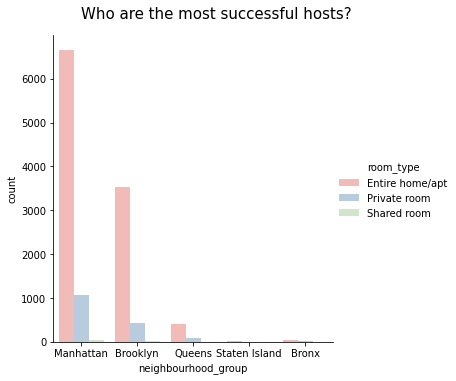

In [ ]:
# The count of the 75% percentile hosts according to different room_type in different areas
df2 = df[df['average_revenue']>=df['average_revenue'].quantile(0.75)]
fig3 = sns.catplot(x='neighbourhood_group',data=df2,hue='room_type',kind='count',palette='Pastel1')
fig3.fig.suptitle('Who are the most successful hosts?',fontsize=15,y=1.05)
fig3.savefig('host.png', bbox_inches = 'tight')

In [ ]:
df['average_revenue'].quantile(0.75)

45625.0

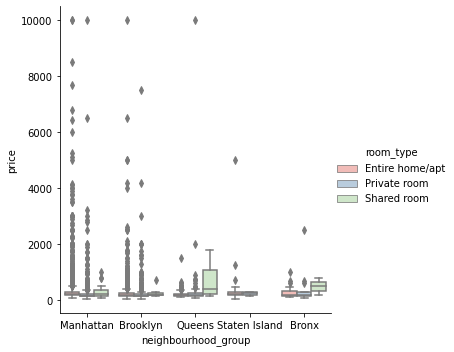

In [ ]:
sns.catplot(x='neighbourhood_group',y='price',data=df2,hue='room_type',kind='box',palette='Pastel1')

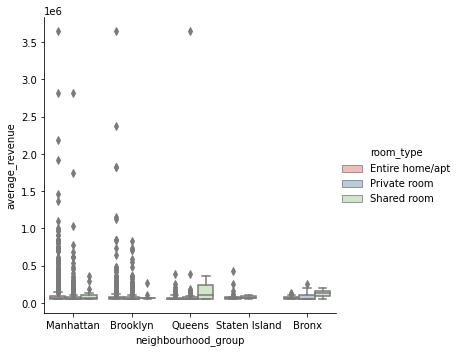

In [ ]:
sns.catplot(x='neighbourhood_group',y='average_revenue',data=df2,hue='room_type',kind='box',palette='Pastel1')

7. Price Distribution in every neighbourhood group

In [ ]:
def plot_price_group(df):
    '''
    This function for plotting the price distribution for every neighbourhood group

    input -> the dataframe
    output -> plotting the price distribution on average for every  neighbourhood group based on the neighbourhoods
    '''
    neigh_list = df['neighbourhood_group'].unique().tolist()
    fig,axs = plt.subplots(5,1,figsize=(20,20) )
    fig.subplots_adjust(hspace=1)

    i = 0
    for group in neigh_list:
        df_price = df[df.neighbourhood_group==group][["neighbourhood","price"]]
        df_price = df_price.groupby("neighbourhood").mean()
        sns.distplot(df_price, ax = axs[i])
        axs[i].set_xlabel(' The price in {}'.format(group))
        axs[i].set_title('the price distribution in {}'.format(group))
        i += 1

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

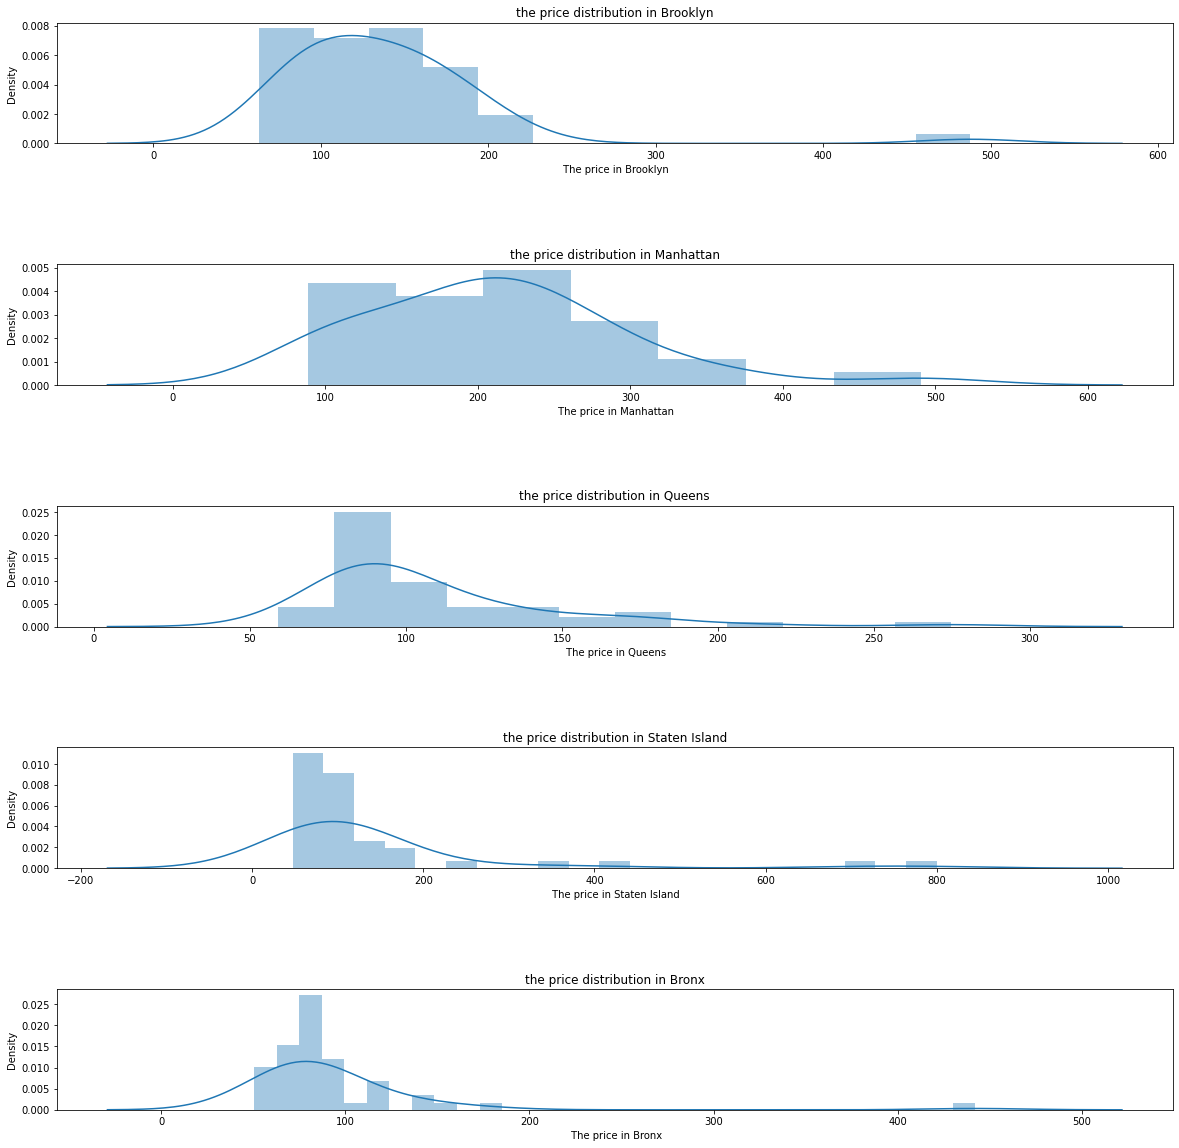

In [ ]:
plot_price_group(df)

it was clear that there’s a difference in the price in some neighborhood group, that the price range in Manhattan is from 90 to 370 on average, and in Brooklyn is from 60 to 220, In Queens is from 60 to 170, In Staten Island is from 40 to 180, In Bronx is from 30 to 120, these averages were calculated based on the neighborhoods in every group.

# Price Distribution For Every Room Type

In [ ]:
def plot_price_room(df):
    '''
    This function for plotting the price distribution for every room type
    input -> the dataframe
    output -> plotting the price distribution for every group
    '''
    room_list = df['room_type'].unique().tolist()
    fig,axs = plt.subplots(3,1,figsize=(10,20) )
    fig.subplots_adjust(hspace=1)

    i = 0
    for room in room_list:
        df_price = df[df.room_type==room][["neighbourhood_group","price"]]
        df_price = df_price.groupby("neighbourhood_group").mean()
        sns.distplot(df_price, ax = axs[i])
        axs[i].set_xlabel(' The price in {}'.format(room))
        axs[i].set_title('the price distribution in {}'.format(room))
        i += 1

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

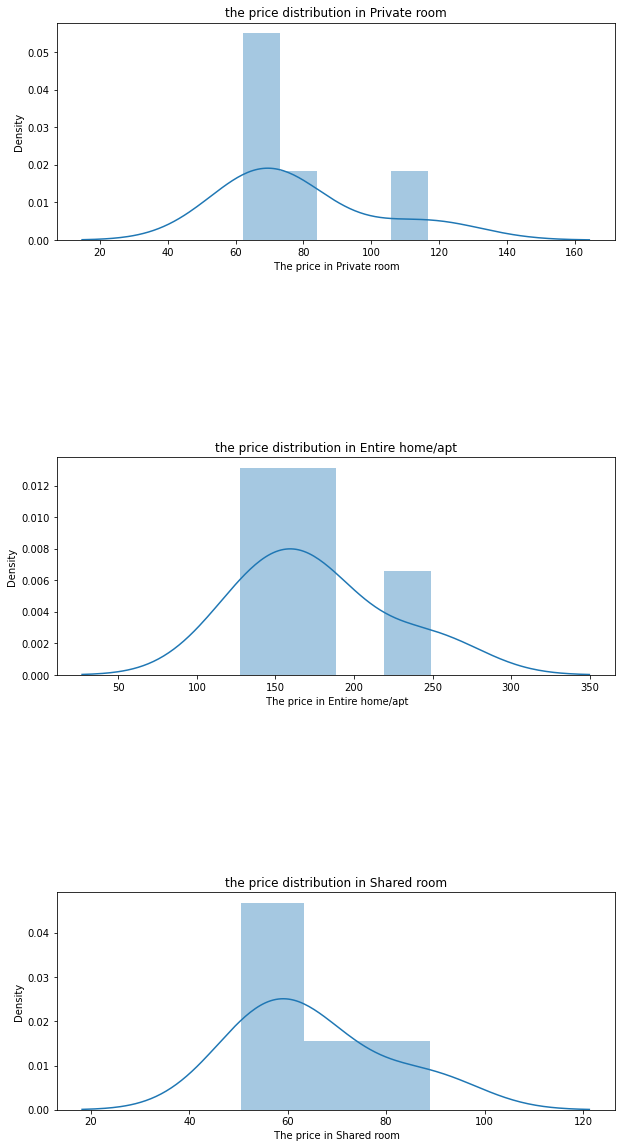

In [ ]:
plot_price_room(df)

# 8.The realtionship between price and another numeric feature

To explore this relationship, we will use this function

In [ ]:
def price_relation(df, disc_var, max_val, min_val, step):
    '''
    This function exploes the relationship between the price and any other numeric feature
    This function restricts the values of price from 0 to 200
    inputs:
    df -> the cleaned dataframe
    disc_var -> the numeric(discrete) feature
    max_val -> the maximum value of the numeric feature used in the plot
    min_val -> the minimum value of the numeric feature used in the plot
    step -> the step between two values in the plot

    outputs:
    plotting the heatmap plot to discover many insights from it
    '''

    plt.figure(figsize = [12, 5])

    # left plot: scatterplot of discrete data with jitter and transparency
    plt.subplot(1, 2, 1)
    sns.regplot(data = df, x = 'price', y = disc_var, fit_reg = False,
               x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

    # right plot: heat map with bin edges between values
    plt.subplot(1, 2, 2)
    bins_x = np.arange(0, 200+.5,20)
    bins_y = np.arange(min_val, max_val+1, step)
    plt.hist2d(data = df, x = 'price', y = disc_var, cmin = .5,
               bins = [bins_x, bins_y])
    plt.colorbar();

 The Relationship Between Price And Minimum Nights

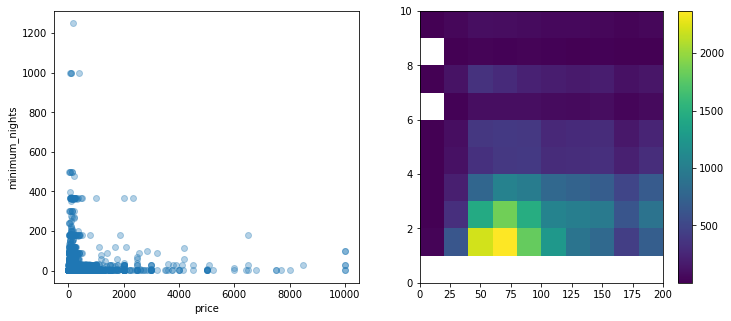

In [ ]:
price_relation(df, 'minimum_nights', 10, 0, 1)

  The Relationship Between Price And Availability

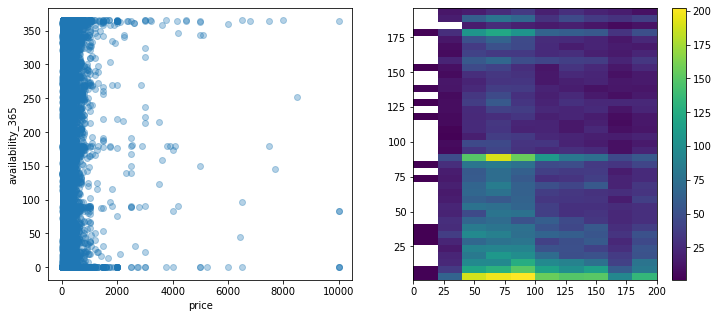

In [ ]:
price_relation(df, 'availability_365', 200, 1, 5)

 The Relationship Between Price And Number Of Reviews

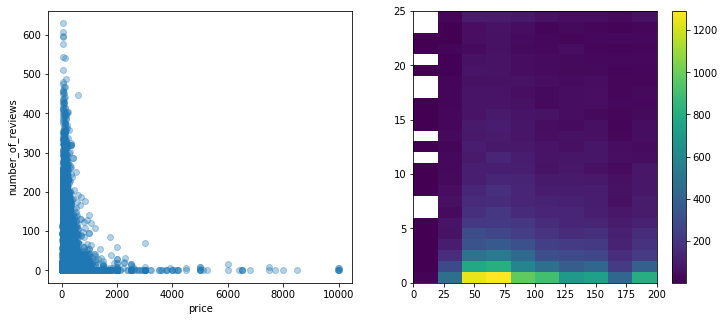

In [ ]:
price_relation(df, 'number_of_reviews', 25, 0, 1)

# Locations

We'll now investigate prices in different regions of the city. For this, we'll use the neighbourhood_group instead of the neighborhood column because it divides the city into five major regions instead of lots of small neighborhoods.

9. Which is the most expensive city ?

neighbourhood_group
Manhattan        163.30
Brooklyn         112.70
Queens            93.03
Staten Island     91.43
Bronx             81.98
Name: price, dtype: float64




/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


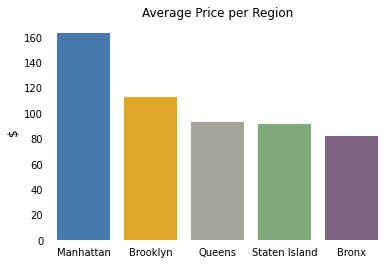

In [ ]:
# Calculating the average price per region
price_region = round(df_clean.groupby('neighbourhood_group').price.mean().sort_values(ascending=False), 2)

# Displaying the results
print(price_region)
print('\n')

# Plotting the average price per region
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

ax = sns.barplot(price_region.index, price_region, palette=sns.xkcd_palette(colors))
ax.set_title('Average Price per Region')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)

Manhattan is considerably more expensive than the rest of the city, which makes perfect sense since it is the richest and the most densely populated part of New York.

Finally, let's see
10. how many rooms are available in each region.

Manhattan        20484
Brooklyn         19623
Queens            5585
Bronx             1070
Staten Island      363
Name: neighbourhood_group, dtype: int64


Manhattan        43.47
Brooklyn         41.64
Queens           11.85
Bronx             2.27
Staten Island     0.77
Name: neighbourhood_group, dtype: float64




/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


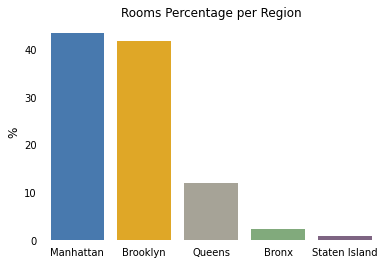

In [ ]:
# Calculating the number of rooms per region
room_regions = df_clean['neighbourhood_group'].value_counts().sort_values(ascending=False)

# Calculating the percentage of rooms per region
room_regions_pct = round(df_clean['neighbourhood_group'].value_counts().sort_values(ascending=False) / len(df_clean) * 100, 2)

# Displaying the results
print(room_regions)
print('\n')
print(room_regions_pct)
print('\n')

# Plotting the percentage of rooms per region
ax = sns.barplot(room_regions_pct.index, room_regions_pct, palette=sns.xkcd_palette(colors))
ax.set_title('Rooms Percentage per Region')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
ax.set_xlabel('')
for kew, spine in ax.spines.items():
    spine.set_visible(False)


# Data Visualisation


Now that we already have some information about the price distribution for rooms in New York City, let's visualize this data geographically and try to determine which points of the city present higher and lower average prices on Airbnb.

First, we'll create a scatter plot using the latitude and longitude columns of our dataset.

Chart 1

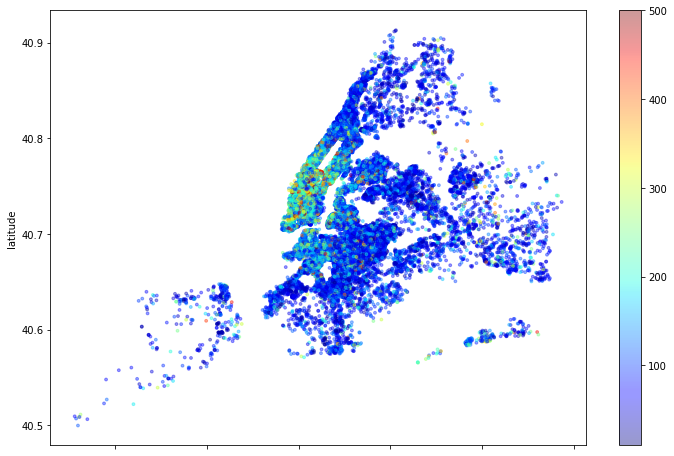

In [ ]:
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

But it is not easy to see the city in charts like these. In this specific case, as New York is one of the most famous cities in the world, we can see some patterns. For example, we can identify the island of Manhattan and we can see Central Park, the white square in the middle of the island.

With this in mind, it is easier to see that the prices in Lower Manhattan are higher than most of the other regions on the map. The region around the Brooklyn Bridge presents some higher values and we can see some very high values on the east side of Queens too.

We can have a general idea of what is going on mostly because we are familiar with the city's geography. If that was not the case, it would've been harder to take any insights from this plot.

Chart 2

The most common room type

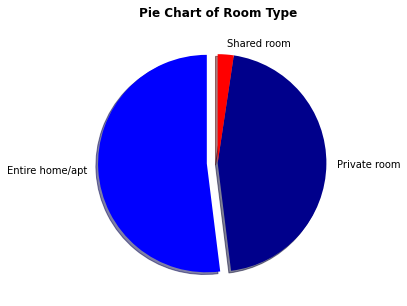

In [ ]:
explode = (0.1,0,0)
dt = df['room_type'].value_counts()
dt.plot(kind='pie',figsize=(5,5),title='Most frequent room type',fontsize=10,explode=explode,startangle=90,colors=['blue','darkblue','red'],shadow=True)
plt.title("Pie Chart of Room Type",fontweight='bold',pad=10)
plt.ylabel("")
plt.show()

Chart 3

The price range in every neighbourhood group for every room type

In [ ]:
def explan_price(df):
    '''
    This function shows a visualization for the relationship between price, neighbourhood group, and room type

    inputs:
    df -> the cleaned dataframe
    outputs:
    the line visualization
    '''
    plt.figure(figsize = [8,6])

    ax = sns.pointplot(data = df, x = 'room_type', y = 'price', hue = 'neighbourhood_group')
    ax.set_yticklabels([0,400,50], minor = True)
    plt.title('The price range in every neighbourhood group for every room type', fontsize = 16)
    plt.xlabel('Room Type',fontsize = 14)
    plt.ylabel('Price', fontsize = 14)
    ax.set_ylim(0,400)
    ax.set_yticks(range(0,450, 50))
    plt.show();

<ipython-input-51-9a4aca1c847c>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,400,50], minor = True)


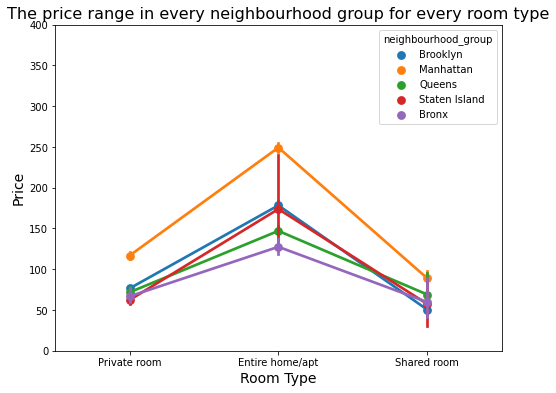

In [ ]:
explan_price(df)


In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Neighbourhood')

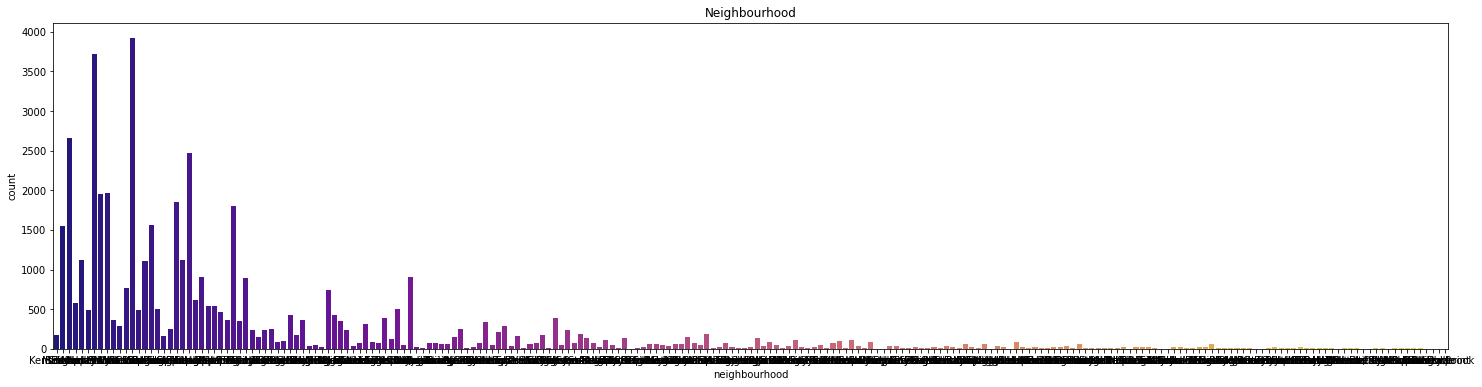

In [ ]:
sns.countplot(df['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')


Chart 3

Map of Neighbourhood Group

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


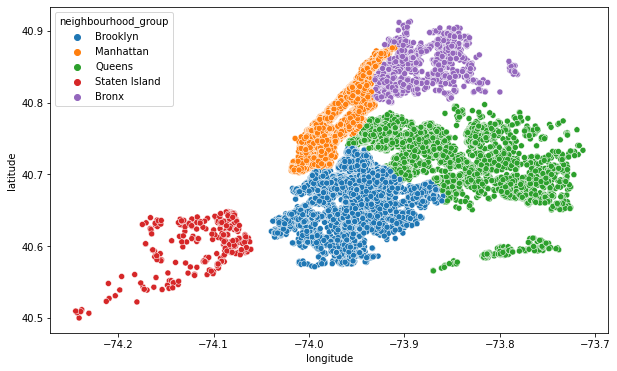

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

Map of Room Type

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


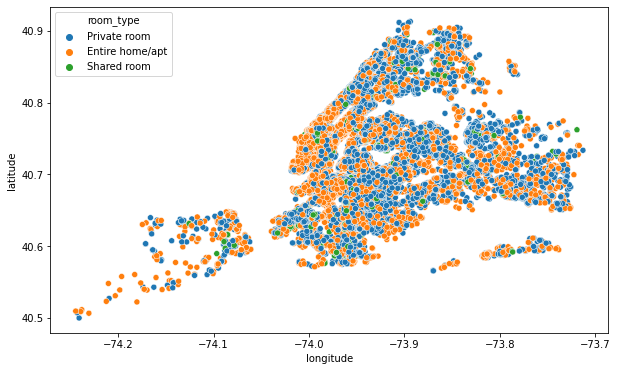

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)
plt.ioff()

Chart 4

Most reviewed neighbourhoods

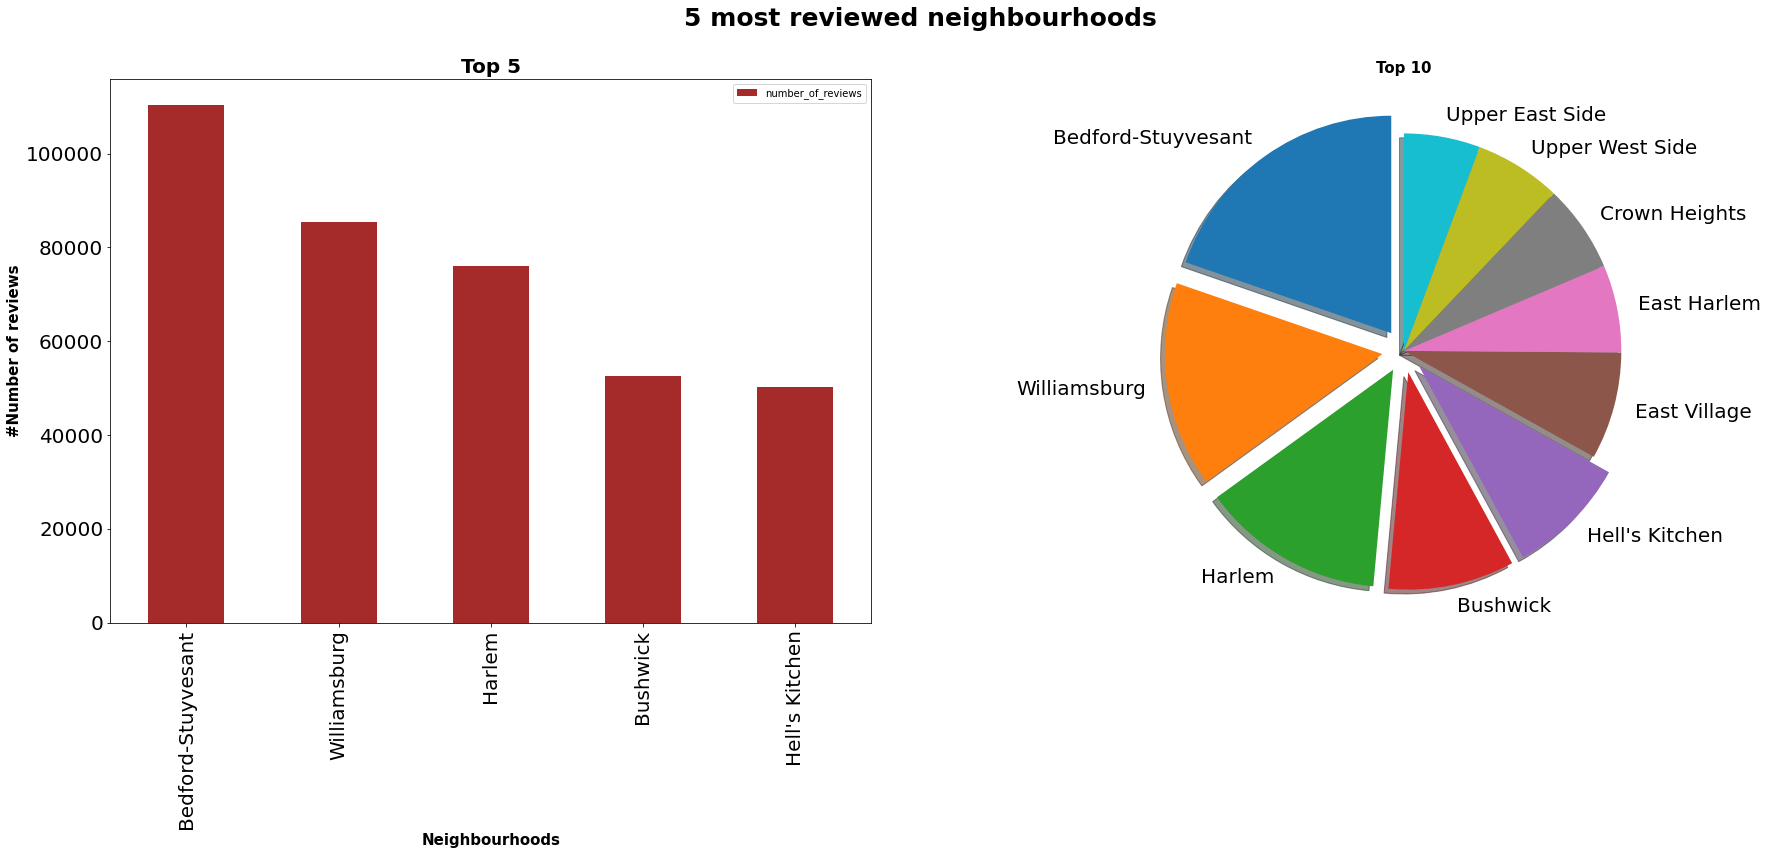

In [ ]:
temp = df[['neighbourhood','number_of_reviews']].groupby('neighbourhood',as_index=False).sum()
temp = temp.sort_values(['number_of_reviews'],ascending=False)

explode = (0.1,0.1,0.1,0.1,0.1,0,0,0,0,0)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('5 most reviewed neighbourhoods',fontweight='bold',fontsize=25)
temp.head(5).plot.bar(x='neighbourhood',color='brown',figsize=(20,15),fontsize=20,ax=ax1)
ax1.set_title('Top 5',fontweight='bold',fontsize=20)
ax1.set_ylabel('#Number of reviews',fontweight='bold',fontsize=15)
ax1.set_xlabel('Neighbourhoods',fontweight='bold',fontsize=15)
temp.head(10).plot(kind='pie',x='neighbourhood',y='number_of_reviews',figsize=(30,10),startangle=90, shadow=True, labels=temp['neighbourhood'], legend = False,fontsize=20,explode=explode,ax=ax2)
ax2.set_title('Top 10',fontweight='bold',fontsize=15)
ax2.set_ylabel('')
ax2.set_xlabel('')
fig.subplots_adjust(hspace=0.5)

<AxesSubplot:xlabel='number_of_reviews', ylabel='price'>

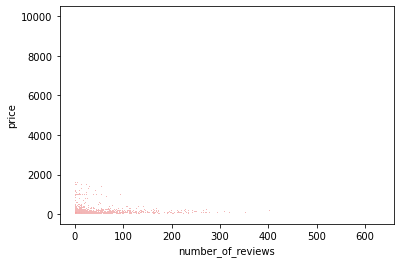

In [ ]:
sns.histplot(y=df['price'],x=df['number_of_reviews'],color='red')
# Price and Number of reviews have points very far which do not render a proper picture

# Conclusion
So, this AirBNB dataset is a rich in data but not on features. From the entire above analysis we can conclude that,

Most visitors don't prefer shared rooms, they tend to visit private room or entire home.

*   Most visitors don't prefer shared rooms, they tend to visit private room or entire home.
*  Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NY



*  Though location of property has high relation on deciding its price, but a property in popular location doesn't mean it will stay occupied in most of the time.
*  Performing a regression on this dataset may result in high error rate, as the features given in this dataset, are of very poor quality in deciding the property valuation. We can see this by looking at corelation heatmap. We would need more features like bedrooms, bathroom, property age (guessed it'd be a very important one), tax_rate applicable on land, room extra amenities, distance to nearest hospital, stores or schoolds. These features might have a high relation with price.


*   We could use a time series analysis to make prediction of occupancy rate at particular time of a month, or particular time of a season.
*   It'd be a better if we had avg guest ratings of a property, that would be beneficial in understanding the property more and could also be a factor in deciding price (a low rated property tends to lower their price)










